# imdb Movie Reviews Classification

#### Notebook Configurations

#### Library Imports

In [184]:
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb

#### Load dataset

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### Decode any review

In [22]:
word_index = imdb.get_word_index()

reverse_word_index = {v: k for k, v in word_index.items()}


def decode_review(review):
    """Convert a review from integers to words"""

    return " ".join(reverse_word_index.get(word) for word in review)

In [40]:
decode_review(train_data[5])

'the effort still been that usually makes for of finished sucking ended and an because before if just though something know novel female i i slowly lot of above and with connect in of script their that out end his and i i'

#### Vectorize Data

Out train and test data is an array of integers which we cannot feed to our neural network.
So we need to convert the data to `tensors` which a neural network will understand.
Let's OneHot encode our data so each datapoint has a fix width of `10000` with `1`'s in places where a common word exists and `0` otherwise.

In [64]:
def vectorize_sequences(sequences, dimension=10000):
    """One Hot encodes the imdb data so integers are mapped to 0 and 1"""

    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0

    return results

In [160]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

On a similar note out labels need to be vectorized as well

In [75]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

#### Model Definition

We have inputs as vectors and labels as scalars. They type of network that works best for such type of problems is a simple stack of fully connected (dense) layers with `relu` activations. We will use 
- two intermediate layers with `16 hidden units` each having `relu` activation
- a third layer that will output a `scalar` prediction having `sigmoid` activation

In [78]:
from keras import models
from keras import layers

In [115]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

#### Compiling the Model

In [116]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Validation

Let's create a validation set by setting apart `10000` samples from the original training data

In [117]:
x_val, y_val = x_train[:10000], y_train[:10000]

partial_x_train, partial_y_train = x_train[10000:], y_train[10000:]

#### Train

In [118]:
%%time

history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5213 - accuracy: 0.7756 - val_loss: 0.4014 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3154 - accuracy: 0.9019 - val_loss: 0.3150 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2313 - accuracy: 0.9269 - val_loss: 0.2880 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1857 - accuracy: 0.9401 - val_loss: 0.2752 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1533 - accuracy: 0.9509 - val_loss: 0.2772 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1253 - accuracy: 0.9620 - val_loss: 0.3117 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1037 - accuracy: 0.9695 - val_loss: 0.3053 - val_accuracy: 0.8853
Epoch 8/20
30

#### Plot training and validation loss

In [150]:
history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

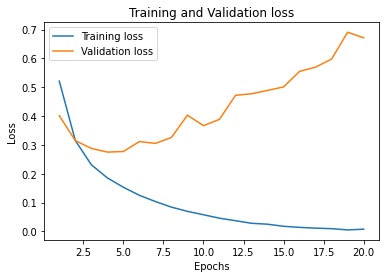

In [156]:
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Plot Training Vs Validation Accuracy

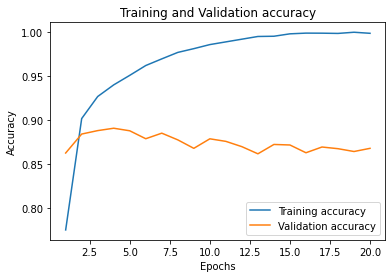

In [155]:
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

#### Observations

- The model clearly seem to overfit after `4` epochs
- We can see how to validation loss is increasing after each epoch
- Since we have a comparatively small dataset we should avoid over complexity

Let's train a new network from scratch for `4` epochs and then evaluate on test data

#### Retrain

In [166]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4807 - accuracy: 0.8083
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2753 - accuracy: 0.9055
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2119 - accuracy: 0.9242
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1733 - accuracy: 0.9394


In [172]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 884us/step - loss: 0.3080 - accuracy: 0.8785


In [176]:
print(f"Test Loss: {test_loss*100:.2f}%\nTest Accuracy: {test_acc*100:.2f}%")

Test Loss: 30.80%
Test Accuracy: 87.85%


#### Predict

In [179]:
y_pred = model.predict(x_test)

In [208]:
n = random.randint(0, 25000)
review, sentiment, sentiment_pred = (
    decode_review(test_data[n]),
    test_labels[n],
    y_pred[n][0],
)
print(
    f"Review\n\n{review}\n\nSentiment Actual: {sentiment}\nSentiment Prediction Probability: {sentiment_pred:.2f}"
)

Review

the halloween was one us filmed br and decent to was two of everything was did that her get it most br don't numbers of guy it make his man forget must ever more interesting think quantum watch is background that out features are what have office have office that to make his just is plots support lives given most that thing low earlier making to of before best one though perhaps hands possibly different was two and decent it by br of and worth are greatest dated worth br make my make played most from giving her future have big also dvd of how my make mind in through those to dark they of because somewhat other from one her plot lewis make heart don't numbers that it i i to have well practically in of films other were her now to more before he otherwise or of mine in of and ran in of partners rat of ever it out heart was itself wonderful that in especially like tries in one is very my to zombies weaker film more whole as it itself of ever but any more it see by apparently for we

In [210]:
np.min(y_pred)

6.6857916e-07

In [211]:
np.max(y_pred)

1.0